In [94]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q holidays
import holidays

!pip install -q meteostat
from meteostat import Point, Daily

In [95]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Set Plot Style**

In [98]:
corDefault = "#6688AA"
corViridis = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151']

def set_plot_style():
    # Background colors
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor="0.85")
    
    # Hiding grid
    plt.grid(False)
    
    # Setting only left and bottom spines as visible
    ax = plt.gca()
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Spines color
    ax.spines['bottom'].set_color("black")
    ax.spines['left'].set_color("black")
    
    # Plot size
    plt.gcf().set_size_inches(6, 5)

    # Plot Style
    plt.style.use('seaborn-v0_8-colorblind')

## **Scatter Plot**

In [100]:
def PlotScatter(x, y, title, xunit, yunit, x_size, lim):
    set_plot_style()
    
    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)

    if (lim == "x"):
        plt.xlim(0,)
    elif (lim == "y"):
        plt.ylim(0,)
    elif (lim == "xy"):
        plt.xlim(0,)
        plt.ylim(0,)

    
    plt.show()
    plt.close()

## **Box Plot**

In [102]:
def PlotBoxPlotV3(df_x, df_y, title, size_x, size_y, save):
    set_plot_style()

    plt.title(title)
    sns.boxplot(x = df_x, y = df_y, palette = "mako")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

In [103]:
def PlotBoxPlotV3_y(df_y, title, size_x, size_y, save):
    set_plot_style()

    plt.title(title)
    sns.boxplot(y = df_y, palette = "mako")

    plt.xlabel("")
    plt.ylabel("")

    plt.gcf().set_size_inches(size_x, size_y)

    #plt.ylim(0,)

    if (save != ""):
        plt.savefig(save)

    plt.show()
    plt.close()

## **IQR Outlier Method**

In [105]:
def IQR_Method(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

## **Regression Plot**

In [107]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    set_plot_style()

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.07, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    #plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

## **Line Plot**

In [109]:
def PlotLine(x, y, title, yunit, x_size, y_size):
  set_plot_style()

  plt.title(title)
  plt.plot(x, y)

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  #plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

# **DATASET LOADING**

For this project, we will import three datasets extracted from the company's database:
- `sell_df`: contains records of all sales transactions for the product;
- `buy_df`: contains records of product purchase transactions;
- `stock_countcount_df`: contains inventory count records over time.

In [112]:
sell_df = pd.read_csv("../data/raw/Dataset_sell.csv")
sell_df['sell_date'] = pd.to_datetime(sell_df['sell_date']).dt.normalize()
sell_df = sell_df[sell_df['sell_date'] < datetime(2025, 5, 1)]
sell_df = sell_df.rename(columns = {'sell_date': 'date'})

sell_df = sell_df.groupby('date').agg({'sell_quantity': 'sum', 'sell_value': 'mean', 'sell_final_value': 'mean'}).reset_index()
sell_df['sell_value'] = np.round(sell_df['sell_value'], 2)
sell_df['sell_final_value'] = np.round(sell_df['sell_final_value'], 2)

sell_df

,date,sell_quantity,sell_value,sell_final_value
0,2024-01-02,163.0,32.10,34.27
1,2024-01-03,215.0,31.13,33.23
2,2024-01-04,2953.0,34.30,36.61
3,2024-01-05,55.0,35.50,37.90
4,2024-01-06,2.0,33.50,35.76
...,...,...,...,...
380,2025-04-24,60.0,34.94,37.30
381,2025-04-25,142.0,34.92,37.28
382,2025-04-28,39.0,35.17,37.56
383,2025-04-29,107.0,34.71,37.06


In [113]:
buy_df = pd.read_csv("../data/raw/Dataset_buy.csv")
buy_df['buy_date'] = pd.to_datetime(buy_df['buy_date']).dt.normalize()
buy_df = buy_df[buy_df['buy_date'] < datetime(2025, 5, 1)]
buy_df = buy_df.rename(columns = {'buy_date': 'date'})

buy_df = buy_df.groupby('date').agg({'buy_quantity': 'sum', 'buy_value': 'mean'}).reset_index()
buy_df['buy_value'] = np.round(buy_df['buy_value'], 2)

buy_df

,date,buy_quantity,buy_value
0,2024-01-02,280.0,28.97
1,2024-01-04,240.0,28.43
2,2024-01-05,240.0,28.43
3,2024-01-09,240.0,28.43
4,2024-01-11,240.0,28.43
...,...,...,...
159,2025-04-14,200.0,30.49
160,2025-04-15,220.0,30.49
161,2025-04-16,200.0,30.49
162,2025-04-22,200.0,30.49


In [114]:
inventory_df = pd.read_csv("../data/raw/Dataset_inventory.csv")

inventory_df = inventory_df.rename(columns = {'inventory': 'stock_count'})

inventory_df.loc[0, 'date_inventory'] = '2024-01-01'
i = pd.DataFrame([["2025-04-30", 0]], columns = ['date_inventory', 'stock_count'])
inventory_df = pd.concat([inventory_df, i], ignore_index=True)

inventory_df['date_inventory'] = pd.to_datetime(inventory_df['date_inventory'])
inventory_df = inventory_df.set_index('date_inventory')
inventory_df = inventory_df.asfreq('D', fill_value = 0)

inventory_df = inventory_df.rename_axis('date').reset_index()

inventory_df

,date,stock_count
0,2024-01-01,175.0
1,2024-01-02,0.0
2,2024-01-03,0.0
3,2024-01-04,0.0
4,2024-01-05,0.0
...,...,...
481,2025-04-26,0.0
482,2025-04-27,0.0
483,2025-04-28,0.0
484,2025-04-29,0.0


# **APIs LOADING**

## **OPEN WEATHER**

In [117]:
city = Point(-22.31553, -49.070822)
city.radius = 120000
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 5, 8)

weather_df = Daily(city, start_date, end_date)
weather_df = weather_df.fetch()[['tavg', 'prcp']]
weather_df = weather_df.rename_axis('date').reset_index()
weather_df = weather_df.rename(columns = {'tavg': 'avg_temperature', 'prcp': 'precipitation'})
weather_df = weather_df[weather_df['date'] < datetime(2025, 5, 1)]

In [118]:
weather_df

,date,avg_temperature,precipitation
0,2024-01-01,24.9,0.1
1,2024-01-02,25.0,0.2
2,2024-01-03,24.8,4.9
3,2024-01-04,24.8,0.0
4,2024-01-05,25.1,0.0
...,...,...,...
481,2025-04-26,21.6,1.6
482,2025-04-27,22.3,0.1
483,2025-04-28,21.7,7.6
484,2025-04-29,21.0,0.3


In [119]:
weather_df.to_csv('../data/raw/weather_data.csv')

## **HOLIDAYS**

In [121]:
holidays_df = weather_df[['date']].copy()

holidays_df['is_holiday'] = holidays_df['date'].apply(lambda x: 1 if x in holidays.Brazil(state='SP') else 0)
holidays_df['holiday_name'] = holidays_df['date'].apply(lambda x: holidays.Brazil(state='SP').get(x) if x in holidays.Brazil(state='SP') else 'None')

holidays_df = holidays_df[holidays_df['date'] < datetime(2025, 5, 1)]

In [122]:
holidays_df

,date,is_holiday,holiday_name
0,2024-01-01,1,Confraternização Universal
1,2024-01-02,0,None
2,2024-01-03,0,None
3,2024-01-04,0,None
4,2024-01-05,0,None
...,...,...,...
481,2025-04-26,0,None
482,2025-04-27,0,None
483,2025-04-28,0,None
484,2025-04-29,0,None


In [123]:
holidays_df.to_csv('../data/raw/holidays_data.csv')

## **INFLATION**

In [125]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json"
inflation_df = pd.DataFrame(requests.get(url).json())

inflation_df = inflation_df.rename(columns = {'data': 'date', 'valor': 'ipca'})

i = pd.DataFrame([["01/05/2025", np.nan]], columns = ['date', 'ipca'])
inflation_df = pd.concat([inflation_df, i], ignore_index=True)
inflation_df['date'] = pd.to_datetime(inflation_df['date'], dayfirst = True)
inflation_df = inflation_df[inflation_df['date'] >= datetime(2024, 1, 1)].copy()
inflation_df = inflation_df.set_index('date')

inflation_df = inflation_df.asfreq('D', method='ffill')
inflation_df = inflation_df.rename_axis('date').reset_index()
inflation_df = inflation_df[inflation_df['date'] < datetime(2025, 5, 1)].copy()

In [126]:
inflation_df

,date,ipca
0,2024-01-01,0.42
1,2024-01-02,0.42
2,2024-01-03,0.42
3,2024-01-04,0.42
4,2024-01-05,0.42
...,...,...
481,2025-04-26,0.43
482,2025-04-27,0.43
483,2025-04-28,0.43
484,2025-04-29,0.43


In [127]:
inflation_df.to_csv('../data/raw/inflation_data.csv')

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [130]:
sell_df.isna().sum()

date                0
sell_quantity       0
sell_value          0
sell_final_value    0
dtype: int64

In [131]:
buy_df.isna().sum()

date            0
buy_quantity    0
buy_value       0
dtype: int64

In [132]:
inventory_df.isna().sum()

date           0
stock_count    0
dtype: int64

In [133]:
weather_df.isna().sum()

date                0
avg_temperature     0
precipitation      25
dtype: int64

In [134]:
weather_df[weather_df['precipitation'].isna()]

,date,avg_temperature,precipitation
239,2024-08-27,15.4,NaN
240,2024-08-28,17.8,NaN
241,2024-08-29,21.6,NaN
242,2024-08-30,24.5,NaN
243,2024-08-31,24.7,NaN
244,2024-09-01,25.9,NaN
245,2024-09-02,25.9,NaN
246,2024-09-03,26.8,NaN
344,2024-12-10,23.8,NaN
345,2024-12-11,23.0,NaN


In [135]:
weather_df = weather_df.fillna(0)

In [136]:
weather_df.isna().sum()

date               0
avg_temperature    0
precipitation      0
dtype: int64

In [137]:
holidays_df.isna().sum()

date            0
is_holiday      0
holiday_name    0
dtype: int64

In [138]:
inflation_df.isna().sum()

date    0
ipca    0
dtype: int64

## **OUTLIERS**

### **1. SELL_DF**

In [141]:
sell_df.describe(include = ['float', 'int'])

,sell_quantity,sell_value,sell_final_value
count,385.000000,385.000000,385.000000
mean,148.049351,34.893013,37.251506
std,346.805203,3.092864,3.301607
min,1.000000,4.550000,4.860000
25%,53.000000,34.240000,36.560000
50%,105.000000,35.330000,37.720000
75%,164.000000,36.000000,38.430000
max,4869.000000,41.600000,44.410000


#### **1.1 Sell Quantity**

The initial box plot and scatter plot revealed extreme outliers in `sell_quantity`, some of which were linked to implausibly low unit values.

Upon further inspection, it became clear that these records did not reflect valid business behavior. For instance, some sales had a unit price below R$15.00, which is not realistic for cement.

To address this, we applied a filter to remove records with:
- `sell_value` below R$25.00.

After this cleaning step, the distribution of sold quantities became much more consistent and representative of typical sale patterns.

In [144]:
sell_df.describe(include = ['float', 'int'])[['sell_quantity']]

,sell_quantity
count,385.000000
mean,148.049351
std,346.805203
min,1.000000
25%,53.000000
50%,105.000000
75%,164.000000
max,4869.000000


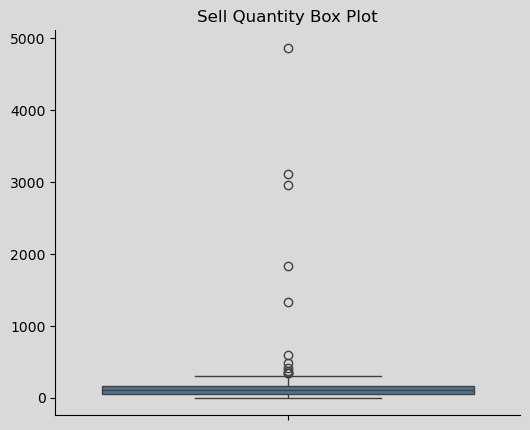

In [145]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Sell Quantity Box Plot", 6, 5, "")

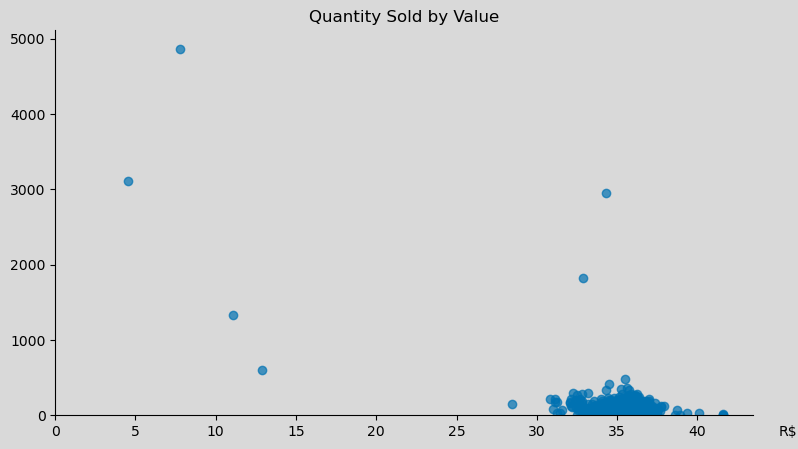

In [146]:
PlotScatter(sell_df['sell_value'], sell_df['sell_quantity'], "Quantity Sold by Value", "R$", "", 9, "xy")

In [147]:
sell_df = sell_df[sell_df['sell_value'] > 25]

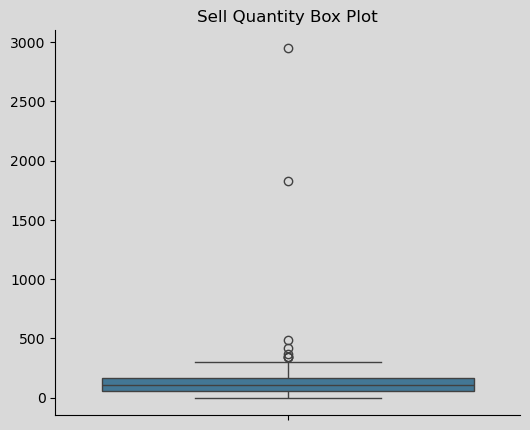

In [148]:
PlotBoxPlotV3_y(sell_df['sell_quantity'], "Sell Quantity Box Plot", 6, 5, "")

#### **1.2 Sell Value**

In [150]:
sell_df.describe(include = ['float', 'int'])[['sell_value']]

,sell_value
count,381.000000
mean,35.164173
std,1.569592
min,28.430000
25%,34.290000
50%,35.350000
75%,36.020000
max,41.600000


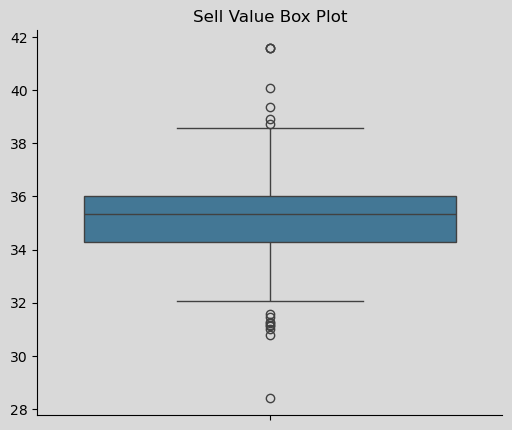

In [151]:
PlotBoxPlotV3_y(sell_df['sell_value'], "Sell Value Box Plot", 6, 5, "")

Although a few data points fall outside the interquartile range, the low standard deviation and the overall consistency of values suggest that no outlier treatment is required at this stage.

### **2. BUY_DF**

In [154]:
buy_df.describe(include = ['float', 'int'])

,buy_quantity,buy_value
count,164.000000,164.000000
mean,278.231707,28.384390
std,93.273830,1.410195
min,54.000000,23.430000
25%,240.000000,27.790000
50%,280.000000,28.300000
75%,280.000000,28.950000
max,640.000000,32.100000


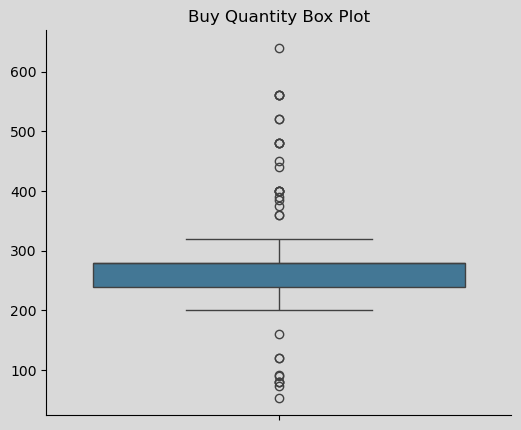

In [155]:
PlotBoxPlotV3_y(buy_df['buy_quantity'], "Buy Quantity Box Plot", 6, 5, "")

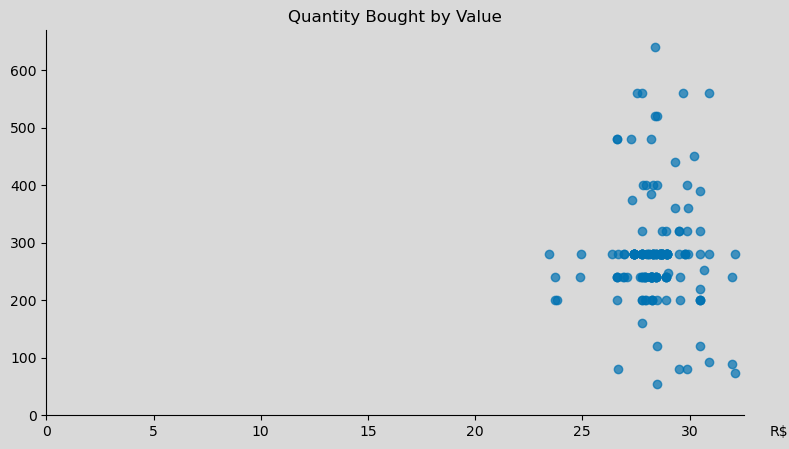

In [156]:
PlotScatter(buy_df['buy_value'], buy_df['buy_quantity'], "Quantity Bought by Value", "R$", "", 9, "xy")

An outlier analysis on `buy_quantity` revealed several points outside the interquartile range.<br>
However, when cross-referenced with the purchase price (`buy_value`), these higher quantities are clearly associated with lower prices, a plausible and strategic behavior in bulk purchasing.

As a result, no outliers were removed from this feature, in order to preserve patterns relevant for modeling price-volume relationships.

### **3. INVENTORY_DF**

In [159]:
initial_inv = inventory_df.loc[0, 'stock_count']

In [160]:
inventory_df = inventory_df.merge(sell_df[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df = inventory_df.merge(buy_df[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)

inventory_df['daily_balance'] = inventory_df['buy_quantity'] - inventory_df['sell_quantity']
inventory_df.loc[0, 'inventory'] = initial_inv

for i in range(1, len(inventory_df)):
    if (inventory_df.loc[i, 'stock_count'] == 0):
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance']
    else:
        inventory_df.loc[i, 'inv_correction'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance'] - inventory_df.loc[i, 'stock_count']
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i, 'stock_count']
    
inventory_df['inv_correction'] = inventory_df['inv_correction'].fillna(0)

inventory_df

,date,stock_count,sell_quantity,buy_quantity,daily_balance,inventory,inv_correction
0,2024-01-01,175.0,0.0,0.0,0.0,175.0,0.0
1,2024-01-02,0.0,163.0,280.0,117.0,292.0,0.0
2,2024-01-03,0.0,215.0,0.0,-215.0,77.0,0.0
3,2024-01-04,0.0,2953.0,240.0,-2713.0,-2636.0,0.0
4,2024-01-05,0.0,55.0,240.0,185.0,-2451.0,0.0
...,...,...,...,...,...,...,...
481,2025-04-26,0.0,0.0,0.0,0.0,475.0,0.0
482,2025-04-27,0.0,0.0,0.0,0.0,475.0,0.0
483,2025-04-28,0.0,39.0,0.0,-39.0,436.0,0.0
484,2025-04-29,0.0,107.0,0.0,-107.0,329.0,0.0


The inventory position was consolidated after the outlier analysis and treatment on purchase and sales datasets. This ensures that the input and output quantities used in the inventory calculation reflect realistic business behavior, avoiding distortions caused by anomalous or erroneous records.

In [162]:
inventory_df.describe(include = ['float', 'int'])[['stock_count', 'daily_balance', 'inventory']]

,stock_count,daily_balance,inventory
count,486.000000,486.000000,486.000000
mean,5.051440,-2.997942,214.763374
std,64.516628,190.382821,1420.814590
min,0.000000,-2713.000000,-3044.000000
25%,0.000000,-78.750000,108.000000
50%,0.000000,0.000000,431.500000
75%,0.000000,75.750000,1230.000000
max,1330.000000,585.000000,2104.000000


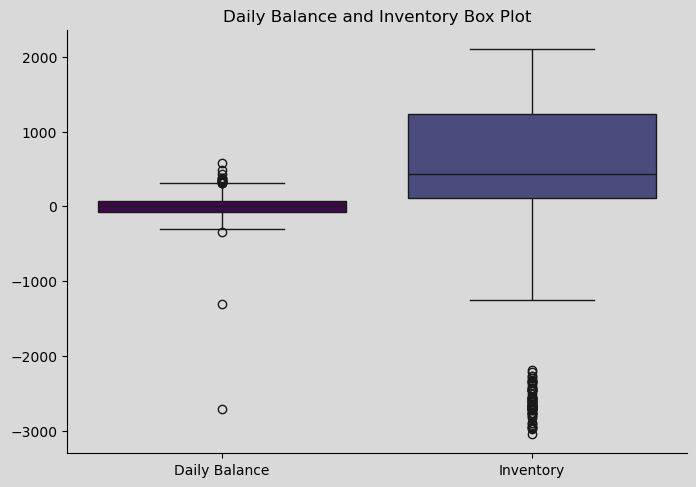

In [163]:
def PBInv(df):
    set_plot_style()

    df = df.rename(columns = {'daily_balance': 'Daily Balance', 'inventory': 'Inventory'})
    df = df.melt(var_name = 'Feature', value_name = 'Value')
               
    sns.boxplot(x = 'Feature', y = 'Value', data = df, palette = {'Daily Balance': corViridis[0], 'Inventory': corViridis[1]})

    plt.title("Daily Balance and Inventory Box Plot")
    plt.xlabel("")
    plt.ylabel("")
                    
    plt.gcf().set_size_inches(8, 5.5)
                    
    plt.show()
    plt.close()

PBInv(inventory_df[['daily_balance', 'inventory']])

The `daily_balance` and `inventory` variables present extremely low minimum values when compared to their respective interquartile ranges and standard deviations. These anomalies may indicate data entry issues or propagation of previous errors, and therefore warrant further investigation before proceeding.

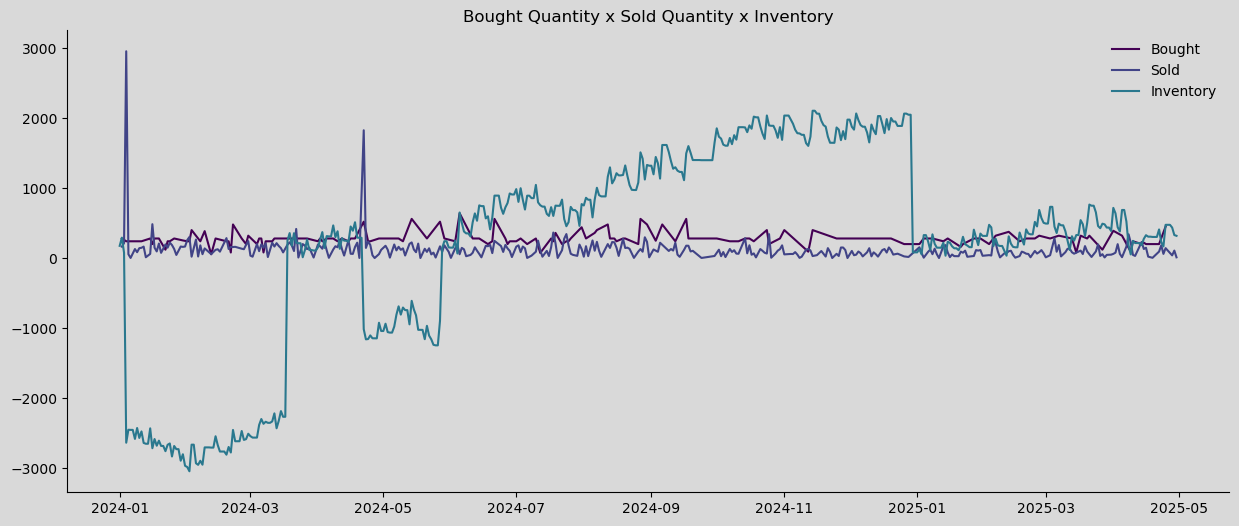

In [165]:
def PlotBSI(buy_df, sell_df, inventory_df):
    set_plot_style()
               
    plt.plot(buy_df['date'], buy_df['buy_quantity'], label = "Bought", color = corViridis[0])
    plt.plot(sell_df['date'], sell_df['sell_quantity'], label = "Sold", color = corViridis[1])
    plt.plot(inventory_df['date'], inventory_df['inventory'], label = "Inventory", color = corViridis[2])

    plt.title("Bought Quantity x Sold Quantity x Inventory")

    legend = plt.legend(loc = "upper right")
    legend.get_frame().set_facecolor('0.85')
    legend.get_frame().set_edgecolor('0.85')
                    
    plt.gcf().set_size_inches(15, 6)
                    
    plt.show()
    plt.close()

PlotBSI(buy_df, sell_df, inventory_df)

Two extreme outliers in the `sell_quantity` feature are negatively impacting the inventory position, creating unrealistic negative values.

To correct this, let's apply a simple filter to exclude extreme cases:
- `sell_quantity` < 1000

In [167]:
sell_df = sell_df[sell_df['sell_quantity'] < 1000]

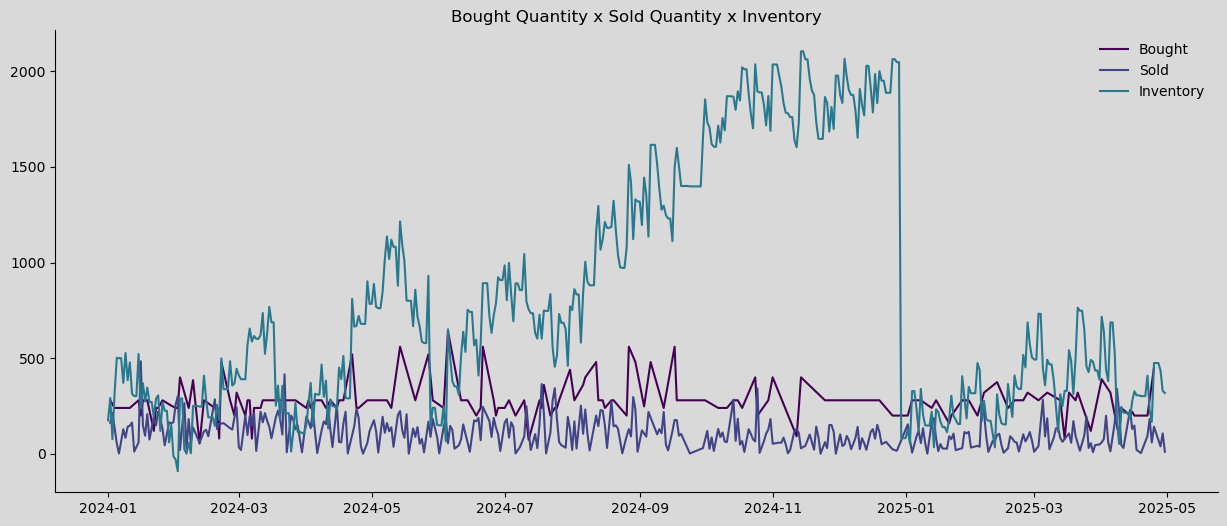

In [168]:
inventory_df = inventory_df.drop(columns = {'inventory', 'daily_balance', 'sell_quantity', 'buy_quantity'}, axis = 1)

inventory_df = inventory_df.merge(sell_df[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df = inventory_df.merge(buy_df[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)
inventory_df['daily_balance'] = inventory_df['buy_quantity'] - inventory_df['sell_quantity']

inventory_df.loc[0, 'inventory'] = initial_inv
inventory_df = inventory_df.drop('inv_correction', axis = 1)

for i in range(1, len(inventory_df)):
    if (inventory_df.loc[i, 'stock_count'] == 0):
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance']
    else:
        inventory_df.loc[i, 'inv_correction'] = inventory_df.loc[i-1, 'inventory'] + inventory_df.loc[i, 'daily_balance'] - inventory_df.loc[i, 'stock_count']
        inventory_df.loc[i, 'inventory'] = inventory_df.loc[i, 'stock_count']
    
inventory_df['inv_correction'] = inventory_df['inv_correction'].fillna(0)

inventory_df = inventory_df.drop(columns = {'sell_quantity', 'buy_quantity'}, axis = 1)

PlotBSI(buy_df, sell_df, inventory_df)

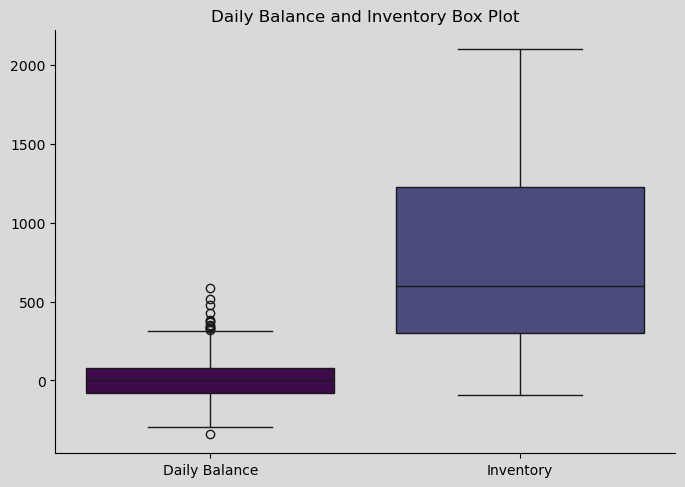

In [169]:
PBInv(inventory_df[['daily_balance', 'inventory']])

## **DATA CONSOLIDATION**

In [231]:
df = pd.date_range(start = '2024-01-01', end = '2025-04-30', freq = 'D')
df = pd.DataFrame({'date': df})

df = df.merge(sell_df, on = 'date', how = 'left') \
        .merge(buy_df, on = 'date', how = 'left') \
        .merge(inventory_df, on = 'date', how = 'left') \
        .merge(weather_df, on = 'date', how = 'left') \
        .merge(inflation_df, on = 'date', how = 'left') \
        .merge(holidays_df, on = 'date', how = 'left')

df = df.fillna(0)

df = df.drop('stock_count', axis = 1)

df.head()

,date,sell_quantity,sell_value,sell_final_value,buy_quantity,buy_value,daily_balance,inventory,inv_correction,avg_temperature,precipitation,ipca,is_holiday,holiday_name
0,2024-01-01,0.0,0.00,0.00,0.0,0.00,0.0,175.0,0.0,24.9,0.1,0.42,1,Confraternização Universal
1,2024-01-02,163.0,32.10,34.27,280.0,28.97,117.0,292.0,0.0,25.0,0.2,0.42,0,None
2,2024-01-03,215.0,31.13,33.23,0.0,0.00,-215.0,77.0,0.0,24.8,4.9,0.42,0,None
3,2024-01-04,0.0,0.00,0.00,240.0,28.43,240.0,317.0,0.0,24.8,0.0,0.42,0,None
4,2024-01-05,55.0,35.50,37.90,240.0,28.43,185.0,502.0,0.0,25.1,0.0,0.42,0,None


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              486 non-null    datetime64[ns]
 1   sell_quantity     486 non-null    float64       
 2   sell_value        486 non-null    float64       
 3   sell_final_value  486 non-null    float64       
 4   buy_quantity      486 non-null    float64       
 5   buy_value         486 non-null    float64       
 6   daily_balance     486 non-null    float64       
 7   inventory         486 non-null    float64       
 8   inv_correction    486 non-null    float64       
 9   avg_temperature   486 non-null    float64       
 10  precipitation     486 non-null    float64       
 11  ipca              486 non-null    object        
 12  is_holiday        486 non-null    int64         
 13  holiday_name      486 non-null    object        
dtypes: datetime64[ns](1), floa

In [237]:
df = df.astype({'sell_quantity': 'int64', 'buy_quantity': 'int64', 'daily_balance': 'int64', 'inventory': 'int64',
                'inv_correction': 'int64', 'ipca': 'float64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              486 non-null    datetime64[ns]
 1   sell_quantity     486 non-null    int64         
 2   sell_value        486 non-null    float64       
 3   sell_final_value  486 non-null    float64       
 4   buy_quantity      486 non-null    int64         
 5   buy_value         486 non-null    float64       
 6   daily_balance     486 non-null    int64         
 7   inventory         486 non-null    int64         
 8   inv_correction    486 non-null    int64         
 9   avg_temperature   486 non-null    float64       
 10  precipitation     486 non-null    float64       
 11  ipca              486 non-null    float64       
 12  is_holiday        486 non-null    int64         
 13  holiday_name      486 non-null    object        
dtypes: datetime64[ns](1), floa

# **SAVING PROCESSED DATASET**

In [239]:
df.to_csv('../data/processed/01_Data_Cleaning.csv', index = False)